In [4]:
from random import shuffle
from turtle import color
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets


(25, 2)
[[6.07223714 8.23355007]
 [7.49800981 7.72171354]
 [6.65405399 7.79919258]
 [5.43078084 8.09886609]
 [6.88696748 7.38302917]
 [1.80919382 3.83336419]
 [1.31385667 3.87578751]
 [0.88371902 4.95540885]
 [1.25387108 6.41344775]
 [5.79541179 9.06573565]]
(25,)
[1 1 1 1 1 0 0 0 0 1]


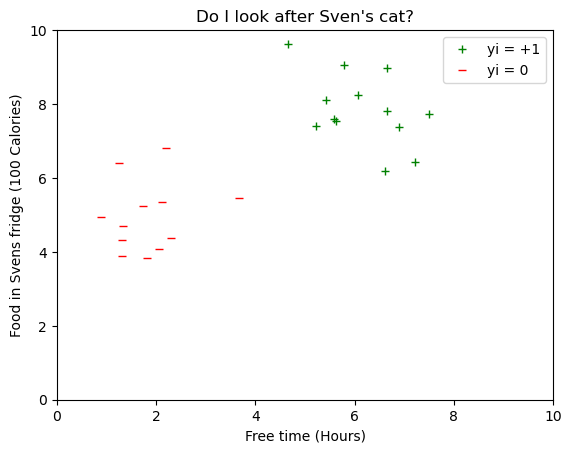

In [5]:

# Generate Dataset
X, y_tmp = datasets.make_blobs(n_samples=25, centers=2, cluster_std=1, n_features=2, center_box=(2, 11), random_state=1)

# Swap 0 and 1 values so graph makes sense
y_tmp2 = np.where(y_tmp == 0, -1, y_tmp)
y_tmp3 = np.where(y_tmp2 == 1, 0, y_tmp2)
y = np.where(y_tmp3 == -1, 1, y_tmp3)

# Look at data
print(X.shape)
print(X[:10])
print(y.shape)
print(y[:10])

plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], '+', color='green', label='yi = +1')
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], '_', color='red', label='yi = 0')
plt.legend()
plt.xlim(np.array([0,10]))
plt.ylim(np.array([0,10]))
plt.xlabel('Free time (Hours)')
plt.ylabel('Food in Svens fridge (100 Calories)')
plt.title("Do I look after Sven's cat?")
plt.show()

In [6]:
# Activation = sum(weight * x_i) + bias

# prediction = 1.0 if activation >= 0 else 0

# Stochastic gradient descent = w = w + learning_rate * (expected - predicted) * x

In [7]:
def predict(x, b, w):
  activation = np.dot(w, x) + b
  return 1 if activation >= 0 else 0

In [8]:
# Hand picked values
bias = -98.97999999999948
weights = [6.215432110423995, 9.487712407652994]

for x, y_i in zip(X, y):
  yhat = predict(x, bias, weights)
  print('Expected: ', y_i, '  Predicted: ', yhat)


Expected:  1   Predicted:  1
Expected:  1   Predicted:  1
Expected:  1   Predicted:  1
Expected:  1   Predicted:  1
Expected:  1   Predicted:  1
Expected:  0   Predicted:  0
Expected:  0   Predicted:  0
Expected:  0   Predicted:  0
Expected:  0   Predicted:  0
Expected:  1   Predicted:  1
Expected:  1   Predicted:  1
Expected:  0   Predicted:  0
Expected:  1   Predicted:  1
Expected:  1   Predicted:  1
Expected:  0   Predicted:  0
Expected:  1   Predicted:  1
Expected:  0   Predicted:  0
Expected:  1   Predicted:  1
Expected:  0   Predicted:  0
Expected:  0   Predicted:  0
Expected:  0   Predicted:  0
Expected:  0   Predicted:  0
Expected:  0   Predicted:  0
Expected:  1   Predicted:  1
Expected:  1   Predicted:  1


In [9]:
# Solution from https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/

def train_weights(X, y, alpha, epochs):
  w = [-0.06620402465860359, 1.6670634233933868]
  #w = [0, 0]
  b = -100
  for epoch in range(epochs):
    sum_err = 0.0
    for i in range(X.shape[0]):
      yhat = predict(X[i], b, w)
      err = y[i] - yhat
      sum_err += err**2
      b = b + alpha * err
      for j in range(X.shape[1]):
        w[j] += alpha * err * X[i][j]
    print('Epoch ', epoch, '. alpha=', alpha, '. Sum error=', sum_err)
    if sum_err == 0:
      print('Converged at ', epoch, ' epochs.')
      return w, b
  return w, b

In [1]:
def perceptron(X, y, alpha, epochs):
    w = [1, 2, 3]
    b = 0
    converged = False
    e = 0
    while converged == False:
        converged = True
        sum_err = 0.0
        e += 1
        
        for i  in range(X.shape[0]):
            if y[i] != predict(X[i], 0, w):

                w = w + alpha * (y[i] - predict(X[i], 0, w)) * X[i]
                err = (y[i] - predict(X[i], 0, w))**2
                sum_err += err
                #b = b + alpha * err
                converged = False
        if e % 50 == 0:
            print('Epoch ', e, '. weights: ', w, '. mse = ', sum_err / X.shape[0])
        if e == epochs:
            return w, b
    return w, b

In [2]:
# Train the weights
alpha = 0.05
epochs = 1000
print(X.shape)
weights, bias = train_weights(X, y, alpha, epochs)
print(weights, bias)
# perceptron function not working
p_w, p_b = perceptron(X, y, alpha, epochs)
print(p_w, p_b)

NameError: name 'X' is not defined

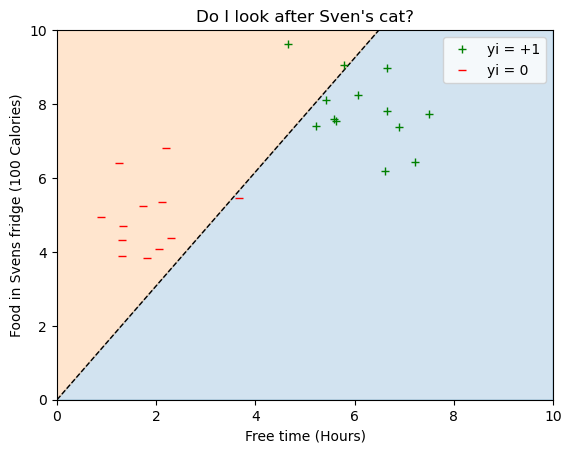

In [64]:
# Plot learned decision boundary

c = -bias/weights[1]
m = -weights[0] / weights[1]

m = - p_w[0] / p_w[1]

xmin, xmax = 0, 10
ymin, ymax = 0, 10
xd = np.array([xmin, xmax])
yd = m*xd #+ c

plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)


plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], '+', color='green', label='yi = +1')
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], '_', color='red', label='yi = 0')
plt.legend()
plt.xlim(np.array([0,10]))
plt.ylim(np.array([0,10]))
plt.xlabel('Free time (Hours)')
plt.ylabel('Food in Svens fridge (100 Calories)')
plt.title("Do I look after Sven's cat?")
plt.show()